    Feature1  Feature2 Label
0       0.10      1.00   cat
1       0.20      0.90   dog
2       0.30      0.80   cat
3       0.40      0.70   dog
4       0.50      0.60   cat
5       0.60      0.50   dog
6       0.70      0.40   cat
7       0.80      0.30   dog
8       0.90      0.20   cat
9       1.00      0.10   dog
10      0.15      0.85   cat
11      0.25      0.75   dog
12      0.35      0.65   cat
13      0.45      0.55   dog
14      0.55      0.45   cat
15      0.65      0.35   dog
16      0.75      0.25   cat
17      0.85      0.15   dog
18      0.95      0.05   cat
19      0.05      0.95   dog
Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

         cat       0.25      1.00      0.40         1
         dog       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



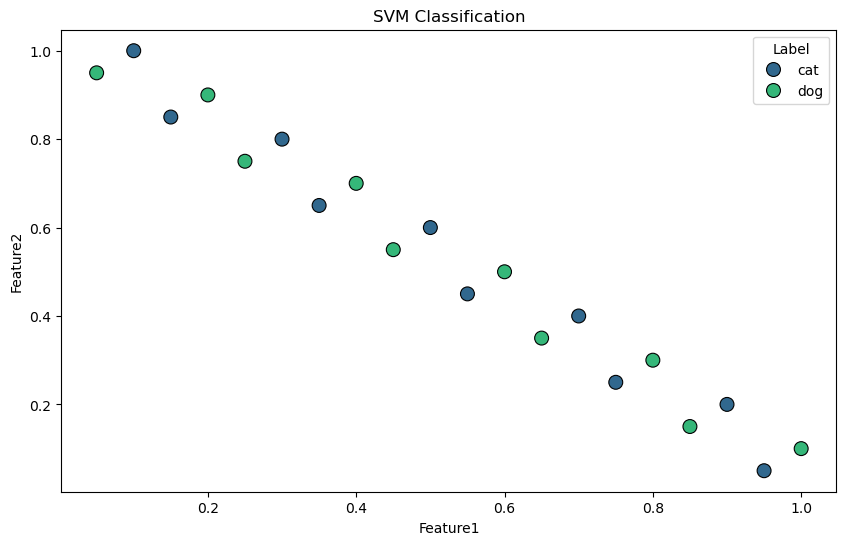

In [1]:
#Import Libraries:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Sample Data:
data = {
    'Feature1': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 0.05],
    'Feature2': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.05, 0.95],
    'Label': ['cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog']
}
df = pd.DataFrame(data)
print(df)

# Fix MKL Warning
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

#Define Features and Target Variable:
X = df[['Feature1', 'Feature2']]
y = df['Label']

#Split Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train SVM Model:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

#Make Predictions:
y_pred = model.predict(X_test)

#Evaluate Model:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

#Visualize Results:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='viridis', s=100, edgecolor='k')
plt.title('SVM Classification')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Label')
plt.show()